#### download image 

In [2]:
!mkdir ./data 
!mkdir ./pretrained 

In [3]:
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
!wget -O ./data/baseball01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg
!wget -O ./data/Jonh_Wick_small.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true

--2022-07-19 01:29:57--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.04s   

2022-07-19 01:29:57 (8.91 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]

--2022-07-19 01:29:57--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7627

#### download model 

In [4]:
!mkdir ./pretrained
!wget -O ./pretrained/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz
!wget -O ./pretrained/ssd_config_02.pbtxt https://gist.githubusercontent.com/dkurt/54a8e8b51beb3bd3f770b79e56927bd7/raw/2a20064a9d33b893dd95d2567da126d0ecd03e85/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt
!!tar -xvf ./pretrained/ssd_mobilenet*.tar.gz -C ./pretrained 

mkdir: cannot create directory ‘./pretrained’: File exists
--2022-07-19 01:30:39--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 64.233.189.128, 2404:6800:4008:c07::80
Connecting to download.tensorflow.org (download.tensorflow.org)|64.233.189.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49318766 (47M) [application/gzip]
Saving to: ‘./pretrained/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz’

./pretrained/ssd_mo 100%[===================>]  47.03M  16.4MB/s    in 2.9s    

2022-07-19 01:30:43 (16.4 MB/s) - ‘./pretrained/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz’ saved [49318766/49318766]

--2022-07-19 01:30:43--  https://gist.githubusercontent.com/dkurt/54a8e8b51beb3bd3f770b79e56927bd7/raw/2a20064a9d33b893dd95d2567da126d0ecd03e85/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt
Resolving gist.githubusercontent.com (gist.githubusercontent.c

['ssd_mobilenet_v3_large_coco_2020_01_14/pipeline.config',
 'ssd_mobilenet_v3_large_coco_2020_01_14/model.ckpt.index',
 'ssd_mobilenet_v3_large_coco_2020_01_14/model.ckpt.data-00000-of-00001',
 'ssd_mobilenet_v3_large_coco_2020_01_14/model.tflite',
 'ssd_mobilenet_v3_large_coco_2020_01_14/frozen_inference_graph.pb',
 'ssd_mobilenet_v3_large_coco_2020_01_14/checkpoint',
 'ssd_mobilenet_v3_large_coco_2020_01_14/model.ckpt.meta',
 'ssd_mobilenet_v3_large_coco_2020_01_14/']

In [5]:
!pip install opencv-python==4.5.2.54

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 51.0 MB 298 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [28]:
import os 
import sys 
import cv2 
import time 
import os.path as osp 
import numpy as np 
import pandas as pd 
import torch 
import matplotlib.pyplot as plt 

In [4]:
def show_version():
    print(f"{np.__version__}")
    print(f"{cv2.__version__}")
    print(f"{sys.version}")

In [5]:
show_version()

1.21.6
4.5.2
3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]


In [23]:
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

In [13]:
cv_net_m = cv2.dnn_DetectionModel('/content/pretrained/ssd_mobilenet_v3_large_coco_2020_01_14/frozen_inference_graph.pb', '/content/pretrained/ssd_config_02.pbtxt')
cv_net_m.setInputSize(320, 320)
cv_net_m.setInputScale(1.0 / 127.5)
cv_net_m.setInputMean((127.5, 127.5, 127.5))
cv_net_m.setInputSwapRB(True)

<dnn_Model 0x7fac996ac670>

In [12]:
image = cv2.imread("/content/data/beatles01.jpg")
print(image.shape)
draw_image = image.copy() 
print(draw_image.shape)

(633, 806, 3)
(633, 806, 3)


In [17]:
classes, confidences, boxes = cv_net_m.detect(image, confThreshold=0.5)

In [25]:
print(len(classes))
print(len(confidences))
print(boxes)

11
11
[[ 48 258 154 291]
 [213 252 158 298]
 [386 266 167 300]
 [560 251 153 322]
 [496 226  80  67]
 [451 227  28  21]
 [472 226  43  35]
 [375 219  17  17]
 [415 220  18  17]
 [314 227  38  23]
 [258 259 101 268]]


In [47]:
def get_detected_image(model, image_array, score_threshold, is_print=True):
    draw_image = image_array.copy()  

    start = time.time()

    classes, confidence, boxews = model.detect(image_array, confThreshold=0.5)

    green_color = (0, 255, 0 )
    red_color = (0, 0, 255)

    for class_id, confidence_score, box in zip(classes.flatten(), confidence.flatten(), boxes):
        if confidence_score > 0.5 : 
            caption ="{} : {:.3f}".format(labels_to_names[class_id], confidence_score)
            cv2.rectangle(draw_image, (box[0], box[1]), (box[0]+box[2], box[1]+box[3]), color = green_color, thickness=2)
            cv2.putText(draw_image, caption, (box[0], box[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.6, red_color, 2)
            print(caption)
        
    if is_print == True : 
        print(f"detection time {round(time.time()- start, 2)}")

    return draw_image

person : 0.837
person : 0.745
person : 0.741
person : 0.692
car : 0.660
car : 0.620
car : 0.609
car : 0.566
person : 0.534
car : 0.534
car : 0.531
detection time 0.12


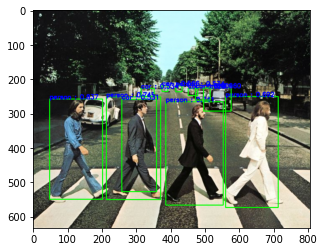

In [48]:
image = cv2.cvtColor(cv2.imread("./data/beatles01.jpg"), cv2.COLOR_BGR2RGB)

result_image = get_detected_image(cv_net_m, image, 0.5, True)

plt.imshow(result_image)


